In [34]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [14]:
data_path = "C:/Users/Modern/Мой диск/Диссертация/Data/Faraday balance/membr BSA FeC 1 all.dat"

In [15]:
data_pd = pd.read_csv(data_path, sep = "\t")
labels = data_pd.columns
print(labels)

Index(['H', 'M', 'T', 'Mc', 'emu', 'Time', 'RTime'], dtype='object')


In [56]:
high_field_part = data_pd[data_pd["H"] > 4]
print(high_field_part)


         H       M       T      Mc      emu      Time  RTime  high_field_part
22   4.170   1.376  27.780   6.783  0.01934  17:47:10     44             True
23   4.373   1.287  27.754   7.161  0.01937  17:47:12     46             True
24   4.557   1.136  27.754   7.503  0.01930  17:47:14     48             True
25   4.740   0.892  27.729   7.808  0.01904  17:47:16     50             True
26   4.902   0.689  27.754   8.160  0.01896  17:47:18     52             True
27   5.126   0.420  27.754   8.638  0.01924  17:47:20     54             True
28   5.309   0.221  27.754   9.024  0.01947  17:47:22     56             True
29   5.513  -0.194  27.754   9.267  0.01932  17:47:24     58             True
30   5.716  -0.560  27.754   9.517  0.01906  17:47:26     60             True
31   5.859  -0.943  27.729   9.716  0.01850  17:47:28     62             True
32   6.062  -1.354  27.754  10.248  0.01885  17:47:30     64             True
33   6.225  -1.814  27.754  10.376  0.01850  17:47:32     66    

<AxesSubplot: xlabel='H', ylabel='emu'>

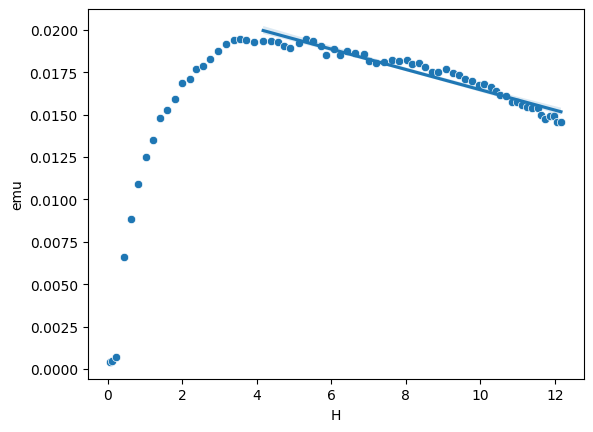

In [65]:
# ax = sns.scatterplot(data = data_pd, x = 'H', y = "emu")
sns.scatterplot(data = data_pd, x = 'H', y = "emu")
sns.regplot(data = high_field_part, x = 'H', y = "emu", scatter=False)
# ax.set(xlabel='Field, KOe', ylabel='Magnetization, emu/g')